In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define dataset path in Google Drive
dataset_path = "/content/drive/MyDrive/LIL/mango.zip"
extract_path = "/content/mango"
# Unzipping dataset
zip_ref = zipfile.ZipFile(dataset_path, 'r')
zip_ref.extractall(extract_path)
zip_ref.close()

# Set dataset directories
#base_dir = "/content/dataset"
train_dir = os.path.join(extract_path, "train")
val_dir = os.path.join(extract_path, "val")
test_dir = os.path.join(extract_path, "test")

In [4]:
# Image preprocessing and augmentation
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')  # 4 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
EPOCHS = 50
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 319ms/step - accuracy: 0.3307 - loss: 1.7088 - val_accuracy: 0.8000 - val_loss: 0.6909
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.7321 - loss: 0.6695 - val_accuracy: 0.8175 - val_loss: 0.6001
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.8886 - loss: 0.3552 - val_accuracy: 0.9000 - val_loss: 0.3207
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - accuracy: 0.9336 - loss: 0.1730 - val_accuracy: 0.8675 - val_loss: 0.3731
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.9348 - loss: 0.1798 - val_accuracy: 0.9325 - val_loss: 0.2453
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.9211 - loss: 0.2014 - val_accuracy: 0.8875 - val_loss: 0.4264
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.9508 - loss: 0.1337 - val_accuracy: 0.9475 - val_loss: 0.1643
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.9640 - loss: 0.1054 - val_accu

In [8]:
# Save the model
model.save("/content/leaf_disease_model.h5")

In [9]:
# Testing the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 360 images belonging to 4 classes.


In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8718 - loss: 0.7632
Test Accuracy: 0.93
Test Loss: 0.42


In [11]:
print(train_generator.class_indices)

{'Anthracnose': 0, 'Bacterial Canker': 1, 'Cutting Weevil': 2, 'Healthy': 3}


In [12]:
cnn_model_path = "/content/leaf_disease_model.h5"
cnn_model = tf.keras.models.load_model(cnn_model_path)
print("CNN model loaded successfully!")

CNN model loaded successfully!


Do you want to upload an image for prediction? (yes/no): yes
Please upload an image:


Saving 20211008_125124 (Custom).jpg to 20211008_125124 (Custom).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


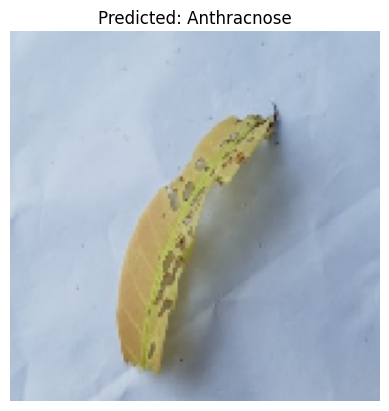

Prediction: Anthracnose

Do you want to upload an image for prediction? (yes/no): yes
Please upload an image:


Saving IMG_20211106_134516 (Custom).jpg to IMG_20211106_134516 (Custom).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


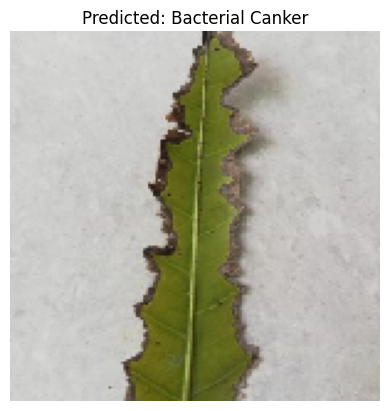

Prediction: Bacterial Canker

Do you want to upload an image for prediction? (yes/no): yes
Please upload an image:


Saving 20211011_161205 (Custom).jpg to 20211011_161205 (Custom).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


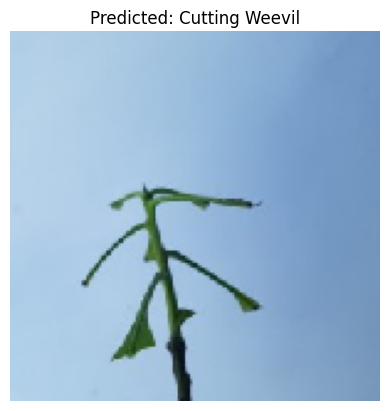

Prediction: Cutting Weevil

Do you want to upload an image for prediction? (yes/no): yes
Please upload an image:


Saving 20211231_130120 (Custom).jpg to 20211231_130120 (Custom).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


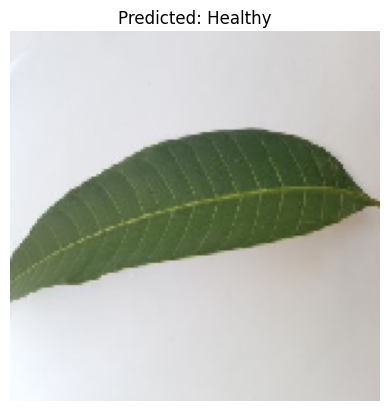

Prediction: Healthy

Do you want to upload an image for prediction? (yes/no): no
Exiting prediction loop.


In [14]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
# Define class labels
class_labels = ["Anthracnose", "Bacterial Canker","Cutting Weevil", "Healthy"]

def predict_leaf_disease():
    while True:
        # Ask the user if they want to continue
        user_input = input("Do you want to upload an image for prediction? (yes/no): ").strip().lower()
        if user_input == "no":
            print("Exiting prediction loop.")
            break

        # Upload image
        print("Please upload an image:")
        uploaded = files.upload()

        for filename in uploaded.keys():
            # Load and preprocess the image
            img_path = filename
            img = image.load_img(img_path, target_size=(150, 150))  # Resize to model input size
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array = img_array / 255.0  # Normalize

            # Make prediction
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction, axis=1)[0]
            predicted_label = class_labels[predicted_class]

            # Show image with prediction
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Predicted: {predicted_label}")
            plt.show()

            print(f"Prediction: {predicted_label}\n")

# Call function to upload and predict in a loop
predict_leaf_disease()
